In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,NaN
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	7
float64		column 3	7
float64		column 4	14
float64		column 5	14
float64		column 6	14
float64		column 7	14
float64		column 8	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1463.000000,1477.000000,1477.000000,1470.000000,1470.000000,1470.000000,1470.000000,1463.000000
mean,0.499768,0.499959,0.500047,0.261395,0.504762,0.007571,0.500014,0.275906
std,0.136855,0.123262,0.086293,0.136427,0.048579,0.076039,0.057692,0.106038
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

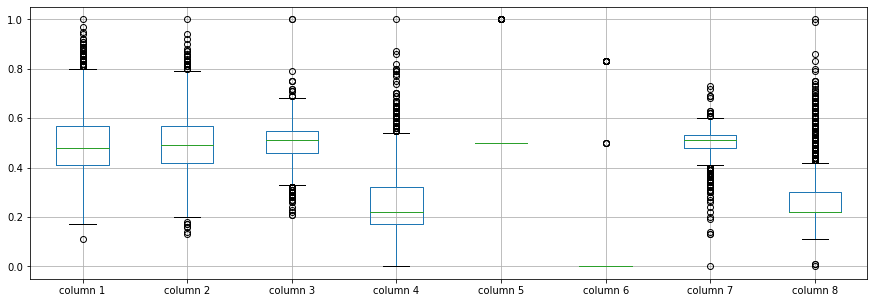

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.499768
column 2    0.499959
column 3    0.500047
column 4    0.261395
column 5    0.504762
column 6    0.007571
column 7    0.500014
column 8    0.275906
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.576889,-0.161532,0.156406,0.065634,0.005696,0.080211,-0.123183
column 2,0.576889,1.000000,-0.275093,0.135045,0.061103,0.000115,0.088571,-0.099619
column 3,-0.161532,-0.275093,1.000000,0.063140,-0.007724,0.009905,-0.196237,-0.017873
column 4,0.156406,0.135045,0.063140,1.000000,-0.005932,-0.009525,-0.106148,-0.052634
column 5,0.065634,0.061103,-0.007724,-0.005932,1.000000,-0.009862,0.043650,0.003550
column 6,0.005696,0.000115,0.009905,-0.009525,-0.009862,1.000000,0.020817,-0.033412
column 7,0.080211,0.088571,-0.196237,-0.106148,0.043650,0.020817,1.000000,0.089841
column 8,-0.123183,-0.099619,-0.017873,-0.052634,0.003550,-0.033412,0.089841,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+50,8+50+50,8+50+50+50,8+50+50+50+50,8+50+50+50+50+50,8+50+50+50+50+50+50,8+50+50+50+50+50,8+50+50+50+50,8+50+50+50,8+50+50,8+50,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.8951665007549785
Epoch: 1 , loss: 2.4028373036695565
Epoch: 2 , loss: 2.216614298198534
Epoch: 3 , loss: 2.0835994663445847
Epoch: 4 , loss: 1.9393571861412213
Epoch: 5 , loss: 1.8808913023575493
Epoch: 6 , loss: 1.7924915422563967
Epoch: 7 , loss: 1.7206726411114568
Epoch: 8 , loss: 1.6257270095141039
Epoch: 9 , loss: 1.591527161390885
Epoch: 10 , loss: 1.5430714436199353
Epoch: 11 , loss: 1.4846682716970858
Epoch: 12 , loss: 1.449552560630052
Epoch: 13 , loss: 1.3973481635684553
Epoch: 14 , loss: 1.3710757740165875
Epoch: 15 , loss: 1.3463934297147004
Epoch: 16 , loss: 1.3158058277938678
Epoch: 17 , loss: 1.3127680459748143
Epoch: 18 , loss: 1.2697009282267613
Epoch: 19 , loss: 1.2352475899717081
Epoch: 20 , loss: 1.2329253450683926
Epoch: 21 , loss: 1.2191682853128598
Epoch: 22 , loss: 1.2155257599509282
Epoch: 23 , loss: 1.1781895270814067
Epoch: 24 , loss: 1.1738476157188416
Epoch: 25 , loss: 1.1

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.429026
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1.7400668467217495, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.03709836078365346

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.220000
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.220000
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.220000
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.220000
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.220000
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.220000
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.230974
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.370000
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.220000


In [20]:
imputations[-1].to_excel("Yeast_NW_1(imp).xlsx", index=False, header=False)